# Step 1: Import Libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

1.13.1


# Import data 

In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

raw = pd.read_csv("E:/MS/Deep Learning/Assignments/Assignment1/covType.data",header=None, sep=",")

raw = raw.reindex(
    np.random.permutation(raw.index))



In [19]:
raw.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54],
           dtype='int64')

In [4]:
raw.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
332328,2804,94,10,108,17,914,236,225,119,2654,...,0,0,0,0,0,0,0,0,0,2
386804,3209,157,12,484,93,2703,233,242,138,2929,...,0,1,0,0,0,0,0,0,0,2
271628,2259,24,24,150,54,933,199,181,108,240,...,0,0,0,0,0,0,0,0,0,3
216289,2727,331,14,85,15,1082,186,222,175,2308,...,0,1,0,0,0,0,0,0,0,2
128781,2793,328,16,120,26,1818,181,220,178,1959,...,0,0,0,0,0,0,0,0,0,2


Last column(Covertype) is considered as the class label for this model. 
For Classification problems , Classification accuracy is considered as a metric. 
we seperate the features and target variables accordingly.

In [5]:
x = raw[raw.columns[:54]]

In [6]:
x.shape

(581012, 54)

In [7]:
y=raw.iloc[:,-1]

In [8]:
y.shape

(581012,)

# Train/Validation Split

Split the dataset into two pieces, so that the model can be trained and tested on different data

In [9]:
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  90)

In [17]:
print(x_train.shape)
x_train.shape[1]

(464809, 54)


54

In [18]:
y_train.shape

(464809,)

In [11]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

2    56680
1    42265
3     7190
7     4172
6     3534
5     1854
4      508
Name: 54, dtype: int64

In [12]:
len(y_train)

464809

In [13]:
len(y_test)

116203

In [14]:
y_train.value_counts()/y_train.value_counts().sum()

2   0.5
1   0.4
3   0.1
7   0.0
6   0.0
5   0.0
4   0.0
Name: 54, dtype: float64

In [15]:
y_test.value_counts()/y_test.value_counts().sum()

2   0.5
1   0.4
3   0.1
7   0.0
6   0.0
5   0.0
4   0.0
Name: 54, dtype: float64

we can observe that base model predicts class 2 would be right 50% of the time followed by class 1 and class 3 . The model should perform better than 50% to be considered.

 For Classification problems: Classification accuracy is considered as a metric. Other metrics are AOC, ROC curve .

# Build Model

Model is built with 2 hidden layers of relu and  with softmax for the output layer.
Loss function used here is sparse_categorical_crossentropy
Optimizer used is Adam
Metrics - uses accuracy, to correctly classify the cover type 

In [13]:
model = keras.Sequential([
    keras.layers.Dense(36, activation=tf.nn.relu,
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(36, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                1980      
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 296       
Total params: 3,608
Trainable params: 3,608
Non-trainable params: 0
_________________________________________________________________


# Fit Model 

In [14]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 10
tf.set_random_seed(15)

# Store training stats
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()],
                   validation_data = (x_test, y_test))


..........

### Evaluate model 

In [15]:
eval_model=model.evaluate(x_test, y_test)
eval_model

116203/116203 [==============================] - 3s 23us/sample - loss: 10.2659 - acc: 0.3631


[10.26593529283408, 0.3630801]

Validation accuracy of the above model is just 36% which is less than 
Now lets normalize the data and then build a deep neural network model. 

### Plot Data

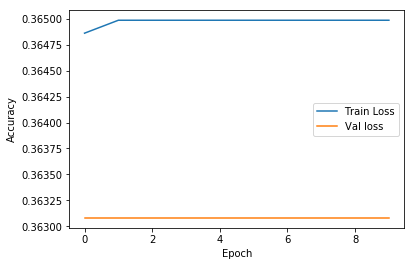

In [20]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim([0.005, 0.05])

plot_history(history)

The reason for straight accuracy line and low accuracy is that the model is not able to learn in 26 epochs. 
Because different features do not have similar ranges of values and hence gradients may end up taking a long time. 

To overcome the model learning problem, we normalize the data. We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly.

In [21]:
from sklearn import preprocessing
#Select numerical columns which needs to be normalized
train_norm = x_train[x_train.columns[0:10]]
test_norm = x_test[x_test.columns[0:10]]
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_test.head())

         0    1    2    3    4    5    6    7    8    9   ...  44  45  46  47  \
227277  1.4 -1.2 -1.2 -1.3 -0.8  0.4  0.1  0.3  0.2  0.1  ...   0   0   0   0   
253931 -0.8  1.3  1.6  1.2 -1.1 -0.9 -2.8 -0.4  1.9 -0.5  ...   1   0   0   0   
158007  0.9  1.4 -0.0  1.4  0.3  2.4 -1.1  0.3  1.2 -0.6  ...   0   0   0   0   
314658 -0.4  0.5  1.3 -0.7  0.0 -0.7 -0.6  1.6  1.1  0.5  ...   0   0   0   0   
524460  1.0 -0.1 -0.5  1.8 -0.3 -0.8  0.8  0.8 -0.1  0.3  ...   0   0   1   0   

        48  49  50  51  52  53  
227277   0   0   0   1   0   0  
253931   0   0   0   0   0   0  
158007   0   0   0   0   0   0  
314658   0   0   0   0   0   0  
524460   0   0   0   0   0   0  

[5 rows x 54 columns]
         0   1    2    3    4    5    6    7   8    9   ...  44  45  46  47  \
451868  1.0 0.9 -0.9  0.3 -0.1  0.5 -0.3  1.0 1.0 -0.3  ...   0   0   0   0   
361209  0.6 0.8 -1.1 -0.7 -0.6 -0.5 -0.1  1.1 0.8  0.3  ...   0   1   0   0   
15137  -0.8 1.8  0.4 -1.1 -0.6  0.4 -0.8 -0.8 0.2  3.2 

In [22]:
#Build neural network model with normalized data
# Build the model (Using Keras API)
# Dense = all neurons are connected
# 64 - number of neurons used.
#softmax function and 

## Compile the model 
#loss function sparse_categorical_crossentropy as the target class labels are categorical and Optimizer is Adam
#Accuracy is the metric/measure considered 

tf.set_random_seed(40)
model2 = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model2.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

Train on 464809 samples, validate on 116203 samples
Epoch 1/26
464809/464809 [==============================] - 12s 25us/sample - loss: 0.5467 - acc: 0.7640 - val_loss: 0.4806 - val_acc: 0.7911
Epoch 2/26
464809/464809 [==============================] - 10s 21us/sample - loss: 0.4466 - acc: 0.8092 - val_loss: 0.4236 - val_acc: 0.8213
Epoch 3/26
464809/464809 [==============================] - 10s 21us/sample - loss: 0.4085 - acc: 0.8278 - val_loss: 0.3964 - val_acc: 0.8339
Epoch 4/26
464809/464809 [==============================] - 10s 21us/sample - loss: 0.3831 - acc: 0.8399 - val_loss: 0.3758 - val_acc: 0.8437
Epoch 5/26
464809/464809 [==============================] - 10s 21us/sample - loss: 0.3657 - acc: 0.8472 - val_loss: 0.3701 - val_acc: 0.8437
Epoch 6/26
464809/464809 [==============================] - 10s 22us/sample - loss: 0.3527 - acc: 0.8535 - val_loss: 0.3527 - val_acc: 0.8544
Epoch 7/26
464809/464809 [==============================] - 10s 22us/sample - loss: 0.3429 - acc

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%).
Validation Accuracy of this model 88.8% is better model.

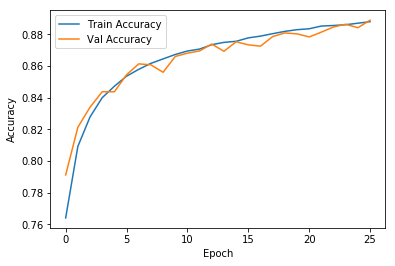

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history2.history['acc']),
           label='Train Accuracy')
  plt.plot(history.epoch, np.array(history2.history['val_acc']),
           label = 'Val Accuracy')
  plt.legend()
  #plt.ylim([0.05, 1])


plot_history(history2)

 From the above graph, we can see that after normalizing the data the model accuracy is increasing with every epoch and at epoch 26, accuracy reached 88% which is far better than the baseline... 
 